<div align="right"><h8><i>Cristina Cristalli - 838022<br>
Francesca Franzese - 847780<br>
    <b>Progetto Social Media Analytics<br>
        CdL Data Science 2020</b></h8></div>

## Analisi della rete sociale

In [2]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
import pandas as pd
import numpy as np
from tabulate import tabulate
import random
import scipy.stats as sp
from scipy.special import factorial
from statsmodels.distributions.empirical_distribution import ECDF
from community import community_louvain
#import warnings
#warnings.filterwarnings('ignore')

Caricamento csv "dbUsers" che contiene le informazioni degli archi per la costruzione del grafo

In [3]:
dbUsers = pd.read_csv('dbUsers.csv')

In [4]:
dbUsers.head()

,nodo_from,nodo_to
0,pietro_carli_69,vladiluxuria
1,AnnaritaNinni,vladiluxuria
2,RilkeRainer,gayit
3,alemilord,vladiluxuria
4,SaCe86,vladiluxuria


Assegnazione di un id univoco per ogni utente diverso e modifica di dbUsers con l'aggiunta degli id

In [5]:
# Dataframe che conterrà tutti gli utenti, presi una sola volta, con il loro id univoco associato
assegna_id = pd.DataFrame()
c1 = dbUsers['nodo_from'].drop_duplicates()
c2 = dbUsers['nodo_to'].drop_duplicates()
c1 = pd.concat([c1, c2])
assegna_id["etichetta"] = c1
c2 = range(0,len(c1))
assegna_id["id_nodo"] = c2

In [6]:
assegna_id.head()

,etichetta,id_nodo
0,pietro_carli_69,0
1,AnnaritaNinni,1
2,RilkeRainer,2
3,alemilord,3
4,SaCe86,4


In [7]:
#per ogni connessione in dbUsers, cerca e salva l'id univoco di entrambi nodo from e nodo to
id_nodo_from = []
id_nodo_to = []
for index, row in dbUsers.iterrows():
    id_nodo_from.append(assegna_id[assegna_id["etichetta"]==row["nodo_from"]]["id_nodo"].values[0])
    id_nodo_to.append(assegna_id[assegna_id["etichetta"]==row["nodo_to"]]["id_nodo"].values[0])

dbUsers["id_nodo_from"] = id_nodo_from
dbUsers["id_nodo_to"] = id_nodo_to

In [8]:
dbUsers.head()

,nodo_from,nodo_to,id_nodo_from,id_nodo_to
0,pietro_carli_69,vladiluxuria,0,791
1,AnnaritaNinni,vladiluxuria,1,791
2,RilkeRainer,gayit,2,11313
3,alemilord,vladiluxuria,3,791
4,SaCe86,vladiluxuria,4,791


<h4>Creazione del Grafo</h4>

In [9]:
# grafo direzionale
grafo = nx.DiGraph()

In [10]:
len(dbUsers)

17327

In [11]:
for n in range(0, len(dbUsers)):
    grafo.add_edge(int(dbUsers['id_nodo_from'][n]),int(dbUsers['id_nodo_to'][n]))

In [12]:
# salvataggio del grafo in formato .gefx per poterlo visualizzare con il programma Gephi
#nx.write_gexf(grafo,'grafo.gexf')

<h2>Studio e distribuzione del grado, Identificazione degli Hub</h2>

In [13]:
print ("Ordine: " + str(grafo.order()))
print ("Dimensione: " + str(grafo.size()))

Ordine: 12182
Dimensione: 17327


In [14]:
indegree=grafo.in_degree()
indegree_values = list(dict(indegree).values())

print ("InDegree media: " +str(np.mean(indegree_values)))
print ("InDegree max: " + str(np.max(indegree_values)))
print ("InDegree min: " +str(np.min(indegree_values)))
print ("InDegree mediana: " +str(np.median(indegree_values)))
print ("InDegree moda: " +str(sp.mode(indegree_values)[0]))


InDegree media: 1.4223444426202594
InDegree max: 1629
InDegree min: 0
InDegree mediana: 0.0
InDegree moda: [0]


In [15]:
outdegree = grafo.out_degree()
outdegree_values = list(dict(outdegree).values())

print ("OutDegree media: " +str(np.mean(outdegree_values)))
print ("OutDegree max: " + str(np.max(outdegree_values)))
print ("OutDegree min: " +str(np.min(outdegree_values)))
print ("OutDegree mediana: " +str(np.median(outdegree_values)))
print ("OutDegree moda: " +str(sp.mode(outdegree_values)[0]))

OutDegree media: 1.4223444426202594
OutDegree max: 24
OutDegree min: 0
OutDegree mediana: 1.0
OutDegree moda: [1]


In [16]:
mutual = grafo.degree()
mutual_values = list(dict(mutual).values())

print ("Mutual media: " +str(np.mean(mutual_values)))
print ("Mutual max: " + str(np.max(mutual_values)))
print ("Mutual min: " +str(np.min(mutual_values)))
print ("Mutual mediana: " +str(np.median(mutual_values)))
print ("Mutual moda: " +str(sp.mode(mutual_values)[0]))


Mutual media: 2.8446888852405188
Mutual max: 1638
Mutual min: 1
Mutual mediana: 1.0
Mutual moda: [1]


Text(0, 0.5, 'CCDF')

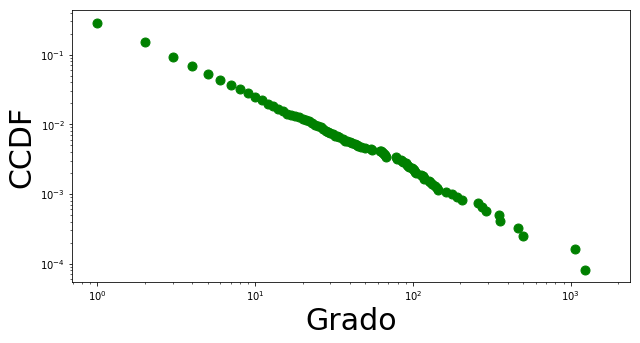

In [17]:
ccdf = ECDF(mutual_values)
x = np.unique(mutual_values)
y = ccdf(x)
fig = plt.figure(figsize=(10,5))
assi = fig.gca()
assi.loglog(x,1-y,color='green',marker='o',linestyle='None', ms = 9)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('CCDF',size=30)

<h4>Identificazione degli hub</h4>
<br>
Sono considerati hub tutti i noti che hanno InDegree superiore a 100, cioè tutti gli utenti che, nell'arco dei 12 giorni, sono stati retweettati più di 100 volte

In [18]:
lista_hubs=[]

for nodo in grafo.nodes():
    if grafo.in_degree(nodo)>100:
        nome_hub = assegna_id[assegna_id["id_nodo"]==nodo]["etichetta"].values[0]
        grado_hub = grafo.in_degree(nodo)
        lista_hubs.append(str(nodo) + "," + str(nome_hub) + "," + str(grado_hub))       

In [19]:
table_hub=[]
sort_lista_hubs = sorted(lista_hubs, key=lambda x: int(x.split(",")[2]), reverse=True)

for elem in sort_lista_hubs:
    table_hub.append([str(elem.split(",")[1]),  str(elem.split(",")[2])])
    
print(tabulate(table_hub, headers=['Nome', 'InDegree']))

Nome               InDegree
---------------  ----------
radio_zek              1629
AUniversale            1236
realUmbertoLM          1066
francescatotolo         496
beabri                  461
Giorgiolaporta          353
LauraPausini            352
marco_gervasoni         290
mediohoriente           274
VujaBoskov              259
gracewee79              204
AlbertoLetizia2         189
catlatorre              178
BeppeSala               162
IoSonoLibera3           141
DarioBallini            140
XFactor_Italia          139
Link4Universe           132
fnicodemo               126
Gianmar26145917         124
meb                     117
roberta_fasani          117
MilanoPride             115
rubio_chef              112
PrimeVideoIT            103
perchetendenza          103


<h2>Metriche</h2>

<h4>Omofilia</h4>

In [20]:
#Omofilia in base al grado
ass_degree = nx.degree_assortativity_coefficient(grafo)
print (ass_degree)

-0.14120823206082797


<h4>Reciprocità</h4>

In [21]:
#Reciprocità
rec = nx.reciprocity(grafo)
print (rec)

0.006002193109020604


<h4>Densità</h4>

In [22]:
num = np.mean(mutual_values)
den = grafo.order()-1
density= float(num/den)
print (float(density))

0.00023353492202943263


<h4>Coefficiente di Clustering</h4>

In [23]:
# Medio
nx.average_clustering(grafo)

0.018365849535134246

In [24]:
# Globale
nx.transitivity(grafo)

0.06518991341717753

<h4>Centralità</h4>

In [25]:
#Betweeness Centrality
#calcola il nodo più centrale della rete
betweenness = nx.betweenness_centrality(grafo, k=50)
nodo_betweeness = sorted(betweenness.items(),key=lambda x:x[1],reverse=True)[0]
nome_betweeness = assegna_id[assegna_id["id_nodo"]==nodo_betweeness[0]]["etichetta"].values[0]
print("Il nodo più centrale della rete è " + nome_betweeness + " con betweeness centrality = " + str(nodo_betweeness[1]))

Il nodo più centrale della rete è beabri con betweeness centrality = 0.0004992199620691138


In [26]:
#closeness centrality degli hub
table_closeness=[]
for hub in sort_lista_hubs:
    nodo = int(hub.split(",")[0])
    nome_hub = hub.split(",")[1]
    closeness = nx.closeness_centrality(grafo, u=nodo, distance=None)
    table_closeness.append([str(nome_hub),  str(closeness)])
    
print(tabulate(table_closeness, headers=['Nome Hub', 'Closeness Centrality']))

Nome Hub           Closeness Centrality
---------------  ----------------------
radio_zek                    0.0998773
AUniversale                  0.0628554
realUmbertoLM                0.0970224
francescatotolo              0.0466301
beabri                       0.0891618
Giorgiolaporta               0.0288977
LauraPausini                 0.028966
marco_gervasoni              0.0239327
mediohoriente                0.0238497
VujaBoskov                   0.020838
gracewee79                   0.0164058
AlbertoLetizia2              0.0145509
catlatorre                   0.0154977
BeppeSala                    0.0133223
IoSonoLibera3                0.0144981
DarioBallini                 0.0106532
XFactor_Italia               0.0114408
Link4Universe                0.0108809
fnicodemo                    0.0145503
Gianmar26145917              0.0101804
meb                          0.00985336
roberta_fasani               0.00960512
MilanoPride                  0.0784316
rubio_chef             

<h2>Community Detection</h2>

<h4>Network Centric community detection: <br><br>
    Massimizzazione della modularità utilizzando le euristiche di Louvain</h4>

In [57]:
# grafo non orientato
grafo_non_orientato = grafo.to_undirected()

In [58]:
partition=community_louvain.best_partition(grafo_non_orientato, resolution=10.0)

In [59]:
print (community_louvain.modularity(partition, grafo_non_orientato))

0.48032420305728923


In [60]:
community = {}
for item in partition.values():
    if item in community:
        community[item]=community[item]+1
    else:
        community[item]=1
print ("# Community: " + str(len(community)))

# Community: 363


In [61]:
sort_community = sorted(community.items(), key=lambda x: x[1], reverse=True)

Data l'alta numerosità delle community, si tengono in considerazione solo quelle con un numero di nodi significativo 

In [62]:
print(tabulate(sort_community[0:10], headers=['Community', 'Numero nodi nella community']))

  Community    Numero nodi nella community
-----------  -----------------------------
          0                           7892
          1                           2500
         31                            363
         27                             74
         42                             67
         30                             59
        233                             39
         45                             27
         89                             23
        235                             23


In [63]:
dbCommunity = pd.DataFrame()
dbCommunity["nodo"]=partition.keys()
dbCommunity["community"]=partition.values()

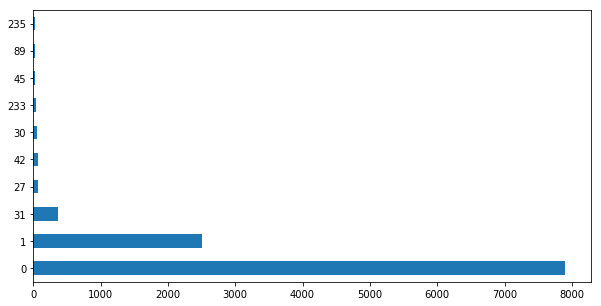

In [64]:
dbCommunity["community"].value_counts().head(10).plot(kind='barh',figsize=(10,5))

Estrapolazione della community di ogni hub, per etichettare le community in base agli hub che contiene

In [65]:
table_community=[]
for hub in sort_lista_hubs:
    nome_hub = hub.split(",")[1]
    var = dbCommunity[dbCommunity["nodo"]==int(hub.split(",")[0])]["community"].values[0]
    table_community.append([str(nome_hub),  str(var)])
    
print(tabulate(table_community, headers=['Nome Hub', 'Community']))

Nome Hub           Community
---------------  -----------
radio_zek                  0
AUniversale                0
realUmbertoLM              1
francescatotolo            1
beabri                     0
Giorgiolaporta             1
LauraPausini              31
marco_gervasoni            1
mediohoriente              0
VujaBoskov                 0
gracewee79                 0
AlbertoLetizia2            0
catlatorre                 0
BeppeSala                  0
IoSonoLibera3              1
DarioBallini               0
XFactor_Italia             0
Link4Universe              0
fnicodemo                  0
Gianmar26145917            1
meb                        0
roberta_fasani             1
MilanoPride                0
rubio_chef                 0
PrimeVideoIT               0
perchetendenza             0


In [221]:
dbCommunity.head()

,nodo,community
0,0,0
1,791,0
2,1,0
3,2,0
4,11313,0


In [223]:
dbCommunity["nome_nodo"] = np.nan

for index, elem in dbCommunity.iterrows():
    nome_utente = assegna_id[assegna_id["id_nodo"]==dbCommunity["nodo"][index]]["etichetta"].values[0]
    dbCommunity["nome_nodo"][index] = nome_utente

c:\users\francesca franzese\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\francesca franzese\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **Indexing both axes**


In [224]:
dbCommunity.head()

,nodo,community,nome_nodo
0,0,0,pietro_carli_69
1,791,0,vladiluxuria
2,1,0,AnnaritaNinni
3,2,0,RilkeRainer
4,11313,0,gayit


In [230]:
# Salvataggio di dbCommunity in un file .csv
dbCommunity.to_csv('dbCommunity.csv',index = False,encoding='utf-8')

ImportError: cannot import name 'get_compression_method' from 'pandas.io.common' (c:\users\francesca franzese\appdata\local\programs\python\python37\lib\site-packages\pandas\io\common.py)

<h4>Hierarchy Centric community detection:<br><br>Algoritmo di Girvan-Newman</h4>

In [81]:
import itertools
from networkx.algorithms import community

community_garvin = []

G = nx.path_graph(grafo)
k = 10
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
nome_com = 0
for communities in limited:
    community_garvin = tuple(sorted(c) for c in communities)   

In [82]:
indici = range(0,10)
stringa = []
for index in indici:
    stringa.append([str(index),  str(len(community_garvin[index]))])
    
print(tabulate(stringa, headers=['Community', 'Numero nodi nella community']))

  Community    Numero nodi nella community
-----------  -----------------------------
          0                           1522
          1                            761
          2                            762
          3                            761
          4                            762
          5                           1523
          6                           1522
          7                           1523
          8                           1523
          9                           1523


In [83]:
table_community_garvin=[]
for hub in sort_lista_hubs:
    var = []
    nome_hub = hub.split(",")[1]
    for index in indici:
        if int(hub.split(",")[0]) in community_garvin[index]:
            var=str(index)
    table_community_garvin.append([str(nome_hub),  var])
    
print(tabulate(table_community_garvin, headers=['Nome Hub', 'Community']))

Nome Hub           Community
---------------  -----------
radio_zek                  0
AUniversale                3
realUmbertoLM              0
francescatotolo            0
beabri                     0
Giorgiolaporta             0
LauraPausini               2
marco_gervasoni            1
mediohoriente              5
VujaBoskov                 5
gracewee79                 5
AlbertoLetizia2            9
catlatorre                 7
BeppeSala                  5
IoSonoLibera3              0
DarioBallini               0
XFactor_Italia             6
Link4Universe              0
fnicodemo                  3
Gianmar26145917            0
meb                        0
roberta_fasani             7
MilanoPride                0
rubio_chef                 4
PrimeVideoIT               5
perchetendenza             6


<h4>Valutazione della community detection eseguita con Garvin Newman</h4>

In [208]:
indici_louvain_sorted = []
for index in range(0, len(sort_community)):
    indici_louvain_sorted.append(sort_community[index][0])
    
stringa_louvain = []
for elem in indici_louvain_sorted:
    stringa_louvain.append(dbCommunity[dbCommunity["community"]==elem]["nodo"].values)

In [217]:
from nf1 import NF1
import networkx as nx
from networkx.algorithms import community

#garvin
garvin=list(community_garvin)
garvin_coms = [tuple(x) for x in garvin]

#louvain
louvain=list(stringa_louvain)
louvain_coms = [tuple(x) for x in louvain]


nf = NF1(garvin,louvain_coms)
results = nf.summary()
print(results['scores'])

                               Value
Index                               
Ground Truth Communities  362.000000
Identified Communities     10.000000
Community Ratio             0.027624
Ground Truth Matched        0.008287
Node Coverage               1.000000
NF1                         0.000577
